In [11]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
from statistics import mean
from datetime import date

import file

In [12]:
# Define the ticker symbol
symbol = 'QQQ'

history = {}

tickerData = yf.Ticker(symbol)
history = tickerData.history(interval='1d', start='2021-1-1', end=date.today())

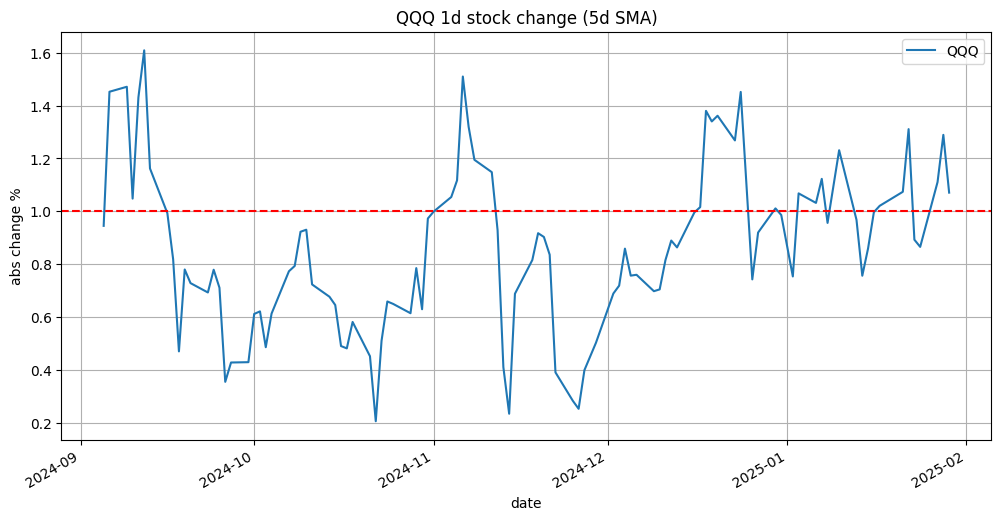

In [20]:
plt.figure(figsize=(12,6))

days = 1
stock_changes = history['Close'].pct_change(periods=days).abs().rolling(window=5).mean() * 100
stock_changes[-100:].plot(label=symbol)

plt.title(f'{symbol} {days}d stock change (5d SMA)')
plt.legend()
plt.axhline(y=1, color='red', linestyle='--')
plt.xlabel('date')
plt.ylabel('abs change %')
plt.grid()

<Axes: title={'center': 'QQQ 1d option performance'}, xlabel='Date'>

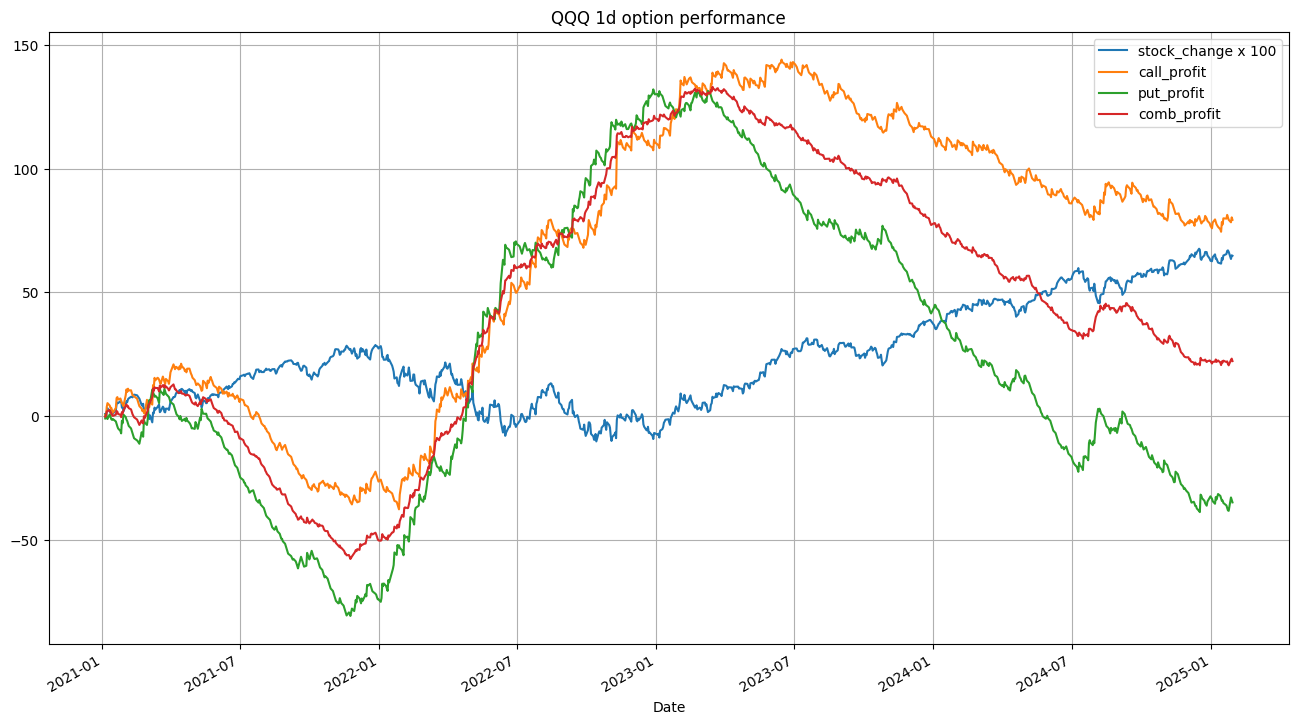

In [14]:
opt_rel_price = 0.42/100 # %
gap = 0.22/100 # %

history['stock_change'] = history.Close.pct_change(periods=1)
history['call_profit'] = ((history.stock_change - gap) / opt_rel_price - 1).clip(lower=-1)
history['put_profit'] = ((-history.stock_change - gap) / opt_rel_price - 1).clip(lower=-1)
history['comb_profit'] = (history.call_profit + history.put_profit) / 2

history['stock_change x 100'] = history['stock_change'] * 100
history[['stock_change x 100', 'call_profit', 'put_profit', 'comb_profit']].cumsum() \
  .plot(figsize=(16,9), grid=True, title=symbol+' 1d option performance')

In [15]:
option_prices = [
  {
    'date': date(2025,1,2),
    'stock_price': 510.23,
    'strikes': {
      511: 2.43,
      512: 1.94,
      513: 1.51,
      514: 1.14,
      515: 0.84
    }
  },
  {
    'date': date(2025,1,5),
    'stock_price': 518.58,
    'strikes': {
      519: 1.60,
      520: 1.18,
      521: 0.83,
      522: 0.57,
      523: 0.37,
      524: 0.24,
      525: 0.15,
      528: 0.05
    }
  }
]

for pr in option_prices:
  stock_price = pr['stock_price']
  pr['rel_price'] = {strike/stock_price-1:call_price/strike for strike,call_price in pr['strikes'].items()}

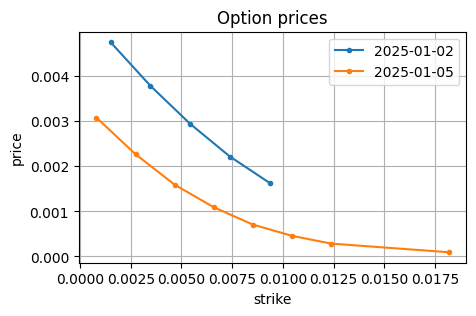

In [16]:
plt.figure(figsize=(5,3))
for pr in option_prices:
  plt.plot(*zip(*sorted(pr['rel_price'].items())), label=pr['date'], marker='.')

plt.title('Option prices')
plt.legend()
plt.xlabel('strike')
plt.ylabel('price')
plt.grid()

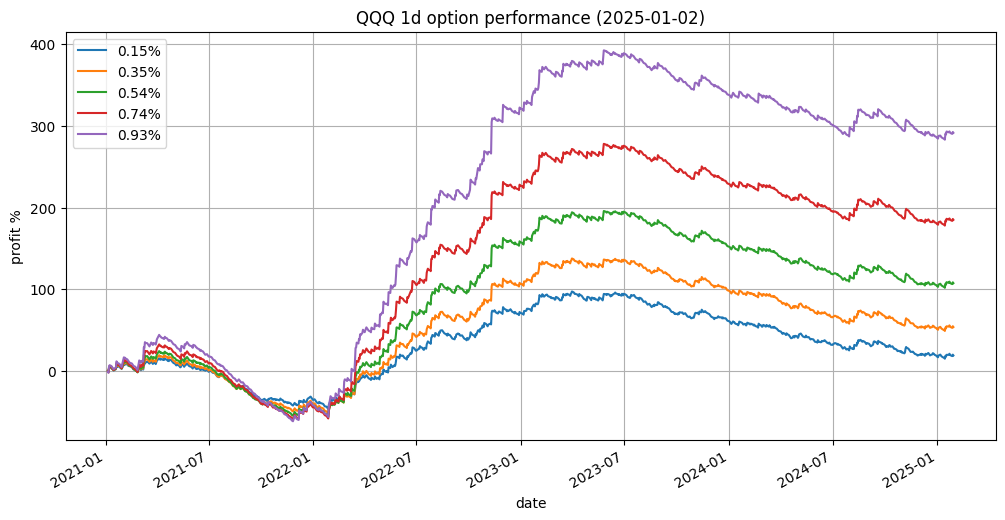

In [17]:
plt.figure(figsize=(12,6))

days = 1
pr = option_prices[0]
for gap, rel_price in pr['rel_price'].items():
    stock_changes = history['Close'].pct_change(periods=days).dropna()
    option_profits = ((stock_changes - gap) / rel_price - 1).clip(lower=-1)
    (option_profits.cumsum()*1).plot(label=f'{gap:.2%}')

plt.title(f'{symbol} {days}d option performance ({pr['date']})')
plt.legend()
plt.xlabel('date')
plt.ylabel('profit %')
plt.grid()

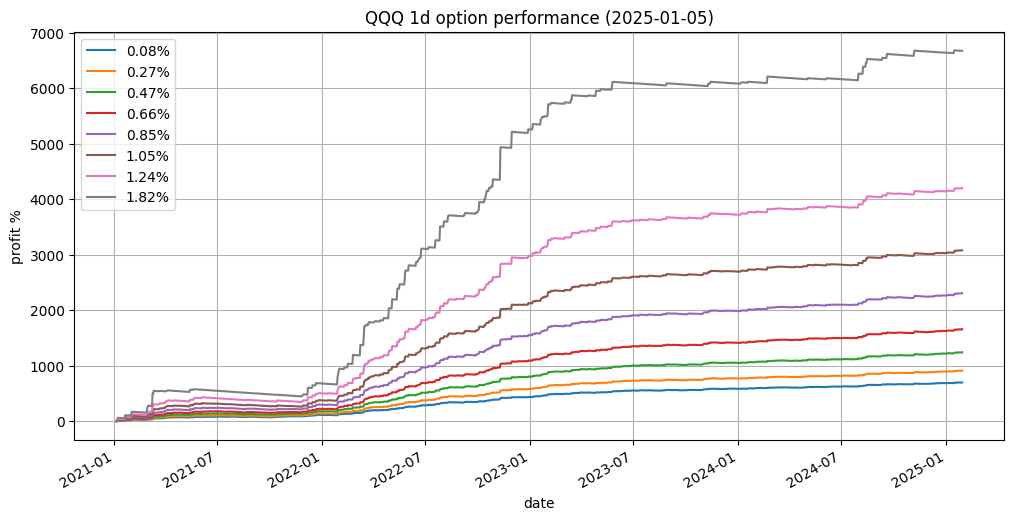

In [18]:
plt.figure(figsize=(12,6))

days = 1
pr = option_prices[1]
for gap, rel_price in pr['rel_price'].items():
    stock_changes = history['Close'].pct_change(periods=days).dropna()
    option_profits = ((stock_changes - gap) / rel_price - 1).clip(lower=-1)
    (option_profits.cumsum()*1).plot(label=f'{gap:.2%}')

plt.title(f'{symbol} {days}d option performance ({pr['date']})')
plt.legend()
plt.xlabel('date')
plt.ylabel('profit %')
plt.grid()

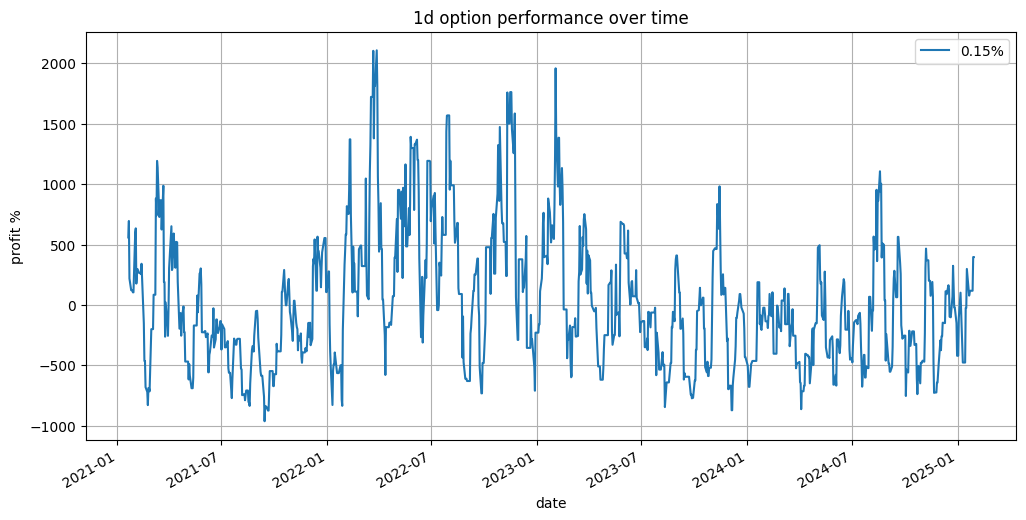

In [19]:
plt.figure(figsize=(12,6))

days = 1
for gap, rel_price in option_prices[0]['rel_price'].items():
    stock_changes = history['Close'].pct_change(periods=days).dropna()
    option_profits = ((stock_changes - gap) / rel_price - 1).clip(lower=-1)
    (option_profits.cumsum()*100).diff(periods=10).plot(label=f'{gap:.2%}')
    break

plt.title(f'{days}d option performance over time')
plt.legend()
plt.xlabel('date')
plt.ylabel('profit %')
plt.grid()